In [1]:
import sys
print(sys.executable)
print(sys.prefix)

G:\GeekDS\venv\python.exe
G:\GeekDS\venv


In [2]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../

nothing added to commit but untracked files present (use "git add" to track)


In [3]:
!git remote -v

origin	https://github.com/Lavishgangwani/DataScienceGeek.git (fetch)
origin	https://github.com/Lavishgangwani/DataScienceGeek.git (push)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Holiday Package Prediciton

#### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

#### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [5]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
cat_cols = df.select_dtypes(include='O')
for i in cat_cols:
    print(f"Categories in {i}")
    print(cat_cols[i].value_counts())
    print("------"*10)

Categories in TypeofContact
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
------------------------------------------------------------
Categories in Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
------------------------------------------------------------
Categories in Gender
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
------------------------------------------------------------
Categories in ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
------------------------------------------------------------
Categories in MaritalStatus
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
------------------------------------------------------------
Categori

- __Gender column has Female Fe Male (Data Quality) Issues__

In [9]:
#fixing gender col
df['Gender'] = df.Gender.replace('Fe Male' ,'Female')
df['MaritalStatus'] = df.MaritalStatus.replace('Unmarried','Single')

In [10]:
df.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [12]:
#checking null values percentages
feature_nan_vals = [i for i in df.columns if df[i].isnull().sum()>=1]

#checking in percent
for feature in feature_nan_vals:
    print(feature , np.round(df[feature].isnull().mean()*100,5),'% Missing Values')
    print('===='*15)

Age 4.62357 % Missing Values
TypeofContact 0.51146 % Missing Values
DurationOfPitch 5.13502 % Missing Values
NumberOfFollowups 0.92062 % Missing Values
PreferredPropertyStar 0.53191 % Missing Values
NumberOfTrips 2.86416 % Missing Values
NumberOfChildrenVisiting 1.35025 % Missing Values
MonthlyIncome 4.76678 % Missing Values


In [13]:
#checking statistical summary on numerical cols
df[feature_nan_vals].select_dtypes(exclude='O').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [14]:
#imputing null values
df.Age.fillna(df.Age.median(),inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0] , inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

In [15]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
#dropping customerid col
df.drop(columns=['CustomerID'] , axis=1 , inplace=True)

## Feature Engineering

#### Feature Extraction

In [17]:
df['totalnumberofvistings'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting' ,'NumberOfPersonVisiting'] , axis=1 , inplace=True)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalnumberofvistings
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [19]:
#checking numerical cols
num_cols = [i for i in df.columns if df[i].dtype != 'O']
print("Number of Numerical Cols : ",len(num_cols))

Number of Numerical Cols :  12


In [20]:
#checking categorical cols
cat_cols = [i for i in df.columns if df[i].dtype == 'O']
print("Number of categorical Cols : ",len(cat_cols))

Number of categorical Cols :  6


In [21]:
#checking numerical Descrete cols
descrete_cols = [feature for feature in num_cols if len(df[feature].unique())<=25]
print("Number of Descrete Cols : ",len(descrete_cols))

Number of Descrete Cols :  9


In [22]:
#checking numerical continous cols
continous_cols = [feature for feature in num_cols if len(df[feature].unique())>=25]
print("Number of Continous Cols : ",len(continous_cols))

Number of Continous Cols :  3


## Splitting the data

In [23]:
X = df.drop(columns=['ProdTaken'] , axis=1)
y = df.ProdTaken

X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [25]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,totalnumberofvistings
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [26]:
y_train.value_counts()

ProdTaken
0    3170
1     740
Name: count, dtype: int64

In [27]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome',
       'totalnumberofvistings'],
      dtype='object'))])

In [29]:
#transforming the columns

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [30]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.389411,1.073130,0.292807,-0.731971,-0.680643,1.534062,1.406426,-1.279971,-0.405448,0.646809
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,0.521645,-0.680643,-0.651864,-0.052422,0.781268,-0.385666,-0.776389
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.707560,-0.276204,-0.705341,1.775261,-1.235083,-0.651864,1.406426,0.781268,0.266381,-1.487987
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,-0.731971,0.428238,-0.651864,-0.781845,-1.279971,-1.221778,-0.776389
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-0.644204,0.292807,-0.731971,-0.126203,1.534062,-1.511269,0.781268,-0.373797,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.459796,0.292807,-0.731971,0.982678,1.534062,-0.052422,0.781268,2.258317,0.646809
3906,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.486381,0.337130,0.292807,-0.731971,-0.126203,-0.651864,1.406426,-1.279971,0.014115,-0.064790
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-1.134871,0.292807,-0.731971,-0.126203,-0.651864,-0.052422,0.781268,-0.919587,-1.487987
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.707560,1.931797,-0.705341,-0.731971,0.982678,1.534062,0.677002,0.781268,0.856445,0.646809


## Model Building

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score,roc_auc_score,roc_curve,classification_report,ConfusionMatrixDisplay

In [38]:
models = {
    "RandomForest" : RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list((models).values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

RandomForest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 score: 0.9262
- Precision: 0.9593
- Recall: 0.6556
- Roc Auc Score: 0.8246




In [40]:
confusion_matrix(y_train , y_train_pred)

array([[3170,    0],
       [   0,  740]], dtype=int64)

In [44]:
cm = confusion_matrix(y_test , y_test_pred)
cm

array([[793,   5],
       [ 62, 118]], dtype=int64)

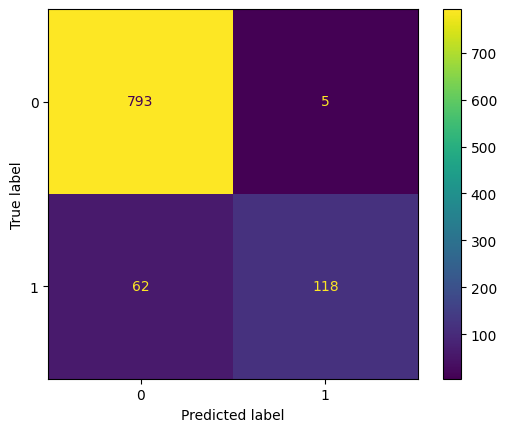

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Applying Smote to improve Recall 

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier()
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test , y_pred)
print(f'Recall with SMOTE: {recall}')
print(f'Accuracy with SMOTE: {accuracy}')

Recall with SMOTE: 0.6555555555555556
Accuracy with SMOTE: 0.9274028629856851


In [62]:
y_smote.value_counts()

ProdTaken
1    3170
0    3170
Name: count, dtype: int64

## Adjusting Threshold 

In [65]:
from sklearn.metrics import recall_score

# Assuming X_train, y_train, X_test, y_test are defined
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.5
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Calculate the new recall
recall = recall_score(y_test, y_pred_adjusted)
print(f'Recall with adjusted threshold: {recall}')


Recall with adjusted threshold: 0.6722222222222223


# Hyperparameter Tuning

In [66]:
depth = [2,3,4,5,6,7,8,9,10,None]
max_feat = ['log2','sqrt','auto']
cri = ['gini' , 'entropy']
min_samples_split= [2,5,10,15,30,40]
min_samples_leaf= [2,5,10,15,30,40]
bootstrap = [True,False]

rf_params  = dict(max_depth=depth,
                 max_features=max_feat,
                 criterion=cri,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf,
                 bootstrap=bootstrap)

rf_params

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['log2', 'sqrt', 'auto'],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 5, 10, 15, 30, 40],
 'min_samples_leaf': [2, 5, 10, 15, 30, 40],
 'bootstrap': [True, False]}

In [72]:
##initialzing RandomSearchCV

rs_model = [
    ('RF' , RandomForestClassifier() , rf_params)
] 

model_params = {}
for name,model,param in rs_model:
    rs = RandomizedSearchCV(estimator=model,
                           param_distributions=param,
                           cv=3,
                           scoring='accuracy',
                           verbose=3,
                           n_iter=100,
                           n_jobs=-1)
    rs.fit(X_train,y_train)
    model_params[name] = {'best_params': rs.best_params_, 'best_score': rs.best_score_}

for model_name, results in model_params.items():
    print(f"---------------- Best Params for {model_name} -------------------")
    print(f"Best Parameters: {results['best_params']}")
    print(f"Best Score: {results['best_score']}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Best Score: 0.8764701797174053


In [ ]:
##initialzing GridSearchCV

gs_model = [
    ('RF' , RandomForestClassifier() , rf_params)
] 

model_params = {}
for name,model,param in gs_model:
    gs = GridSearchCV(estimator=model,
                      param_grid=param,
                        cv=3,
                        scoring='accuracy',
                        verbose=2,
                        n_jobs=-1)
    gs.fit(X_train,y_train)
    model_params[name] = {'best_params': gs.best_params_, 'best_score': gs.best_score_}

for model_name, results in model_params.items():
    print(f"---------------- Best Params for {model_name} -------------------")
    print(f"Best Parameters: {results['best_params']}")
    print(f"Best Score: {results['best_score']}")

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


## Checking params given by params model

In [69]:
models = {
    "RF" : RandomForestClassifier(criterion='entropy',
                                 min_samples_split=5,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=False)
    
}

for i in range(len(list(models))):
    algo = list(models.values())[i]
    algo.fit(X_train,y_train)

    #make pred
    y_train_pred = algo.predict(X_train)
    y_test_pred = algo.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

RF
Model performance for Training set
- Accuracy: 0.9517
- F1 score: 0.9489
- Precision: 0.9946
- Recall: 0.7486
- Roc Auc Score: 0.8739
----------------------------------
Model performance for Test set
- Accuracy: 0.8916
- F1 score: 0.8755
- Precision: 0.9302
- Recall: 0.4444
- Roc Auc Score: 0.7185




## plotting ROC CURVE

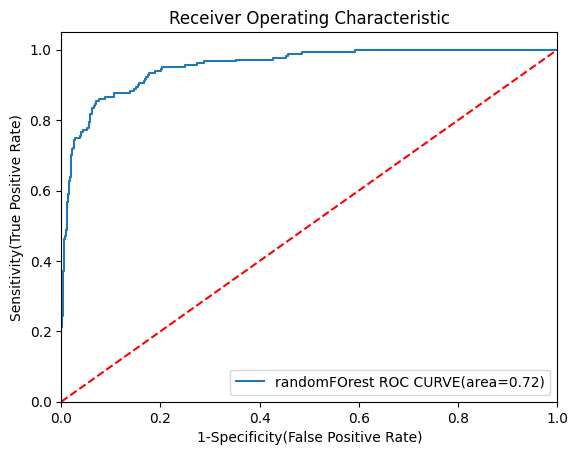

In [71]:
plt.figure()
auc_models = [{
    'label' : "randomFOrest",
    'model' : RandomForestClassifier(criterion='entropy',
                                 min_samples_split=5,
                                 min_samples_leaf=2,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=False),
    'auc' : 0.7185
}]

#now plot the roc curve
for al in auc_models:
    model = al['model']
    model.fit(X_train,y_train)

    #compute fpr,tpr,threshold
    fpr,tpr,threshold = roc_curve(y_test , model.predict_proba(X_test)[:,1])

    #plot the graph
    plt.plot(fpr,tpr,label='%s ROC CURVE(area=%.2f)' % (al['label'],al['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 